# Step 0: Import the necesssary libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 1: Import the csv file

In [ ]:
data=pd.read_csv('//GBMLVFILFS05N02/home3$/ChanAbc/Profile/Desktop/Personal/Data Academy/Udemy/Nano Degree - Projects/Project 2/noshowappointments-kagglev2-may-2016.csv')
data.info()

# Step 2: Question 
#1. Gender distribution for appointment drops
#2. How Scholarship impact the appointments
#3. Do seniding SMS improve the appointment drops

# Step 3: Data Analysis

In [15]:
# Information of the input data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [14]:
#Convert the data formet of 'ScheduledDay', 'AppointmentDay'
data['ScheduledDay'] =  pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] =  pd.to_datetime(data['AppointmentDay'])

In [ ]:
#No Null values

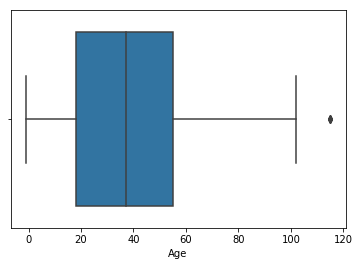

In [19]:
# See the Age group is valid
sns.boxplot(data['Age']);

In [20]:
#Remove invalid age group values and age >=100 from the data set
data = data[ (data['Age'] <=100) & (data['Age']>0)]

In [22]:
#Calculate the value count of Yes and No in 'No-show'
df_count = data['No-show'].value_counts()
df_count

No     85303
Yes    21677
Name: No-show, dtype: int64

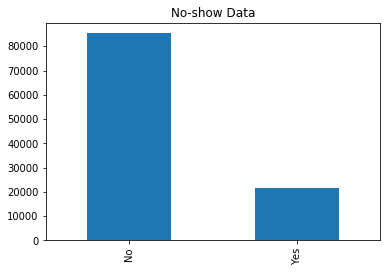

In [26]:
#Plot the 
df_count.plot(kind='bar',title="No-show Data");

In [83]:
#Define a function to take the key from user, group by this key &'No-Show' and return the propability for No-Show's
def calculateProbability(df,keys,return_result=False):
    #Add 'No-Show' as paremeter other than the key to group the input data frame
    keys.append('No-show')
    lst = [] #Delcare list variable 
    lst_key= {} #Declare key variable
    df_temp = df.groupby(keys).count() 
    #display(df_temp)
    
    for i in range(0,len(df_temp),2):
        # print(len(df_temp)) # Count of combinations
        # print("Value of i is",i) # loop value
        # print(df_temp['PatientId'][i+1] , df_temp['PatientId'][i]) #value of each row
        # print(df_temp.index[i][0])
        lst.append(df_temp['PatientId'].iloc[i+1] / (df_temp['PatientId'].iloc[i]+df_temp['PatientId'].iloc[i+1]))
        #logic is - value of "No-Show" as Yes / (Total value for YES+No)
        lst_key[df_temp.index[i][0]] = df_temp['PatientId'].iloc[i+1] / (df_temp['PatientId'].iloc[i]+df_temp['PatientId'].iloc[i+1])    
    if(return_result):
        return lst_key
    return lst

## Gender Analysis

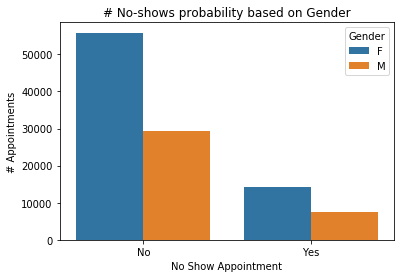

In [71]:
#Get the propability based on the Gender
count_gender = calculateProbability(data,['Gender'])
# count_gender #display vlaues
#Plot the graph
sns.countplot(data['No-show'], hue=data['Gender'])
plt.title('# No-shows probability based on Gender');
plt.xlabel('No Show Appointment')
plt.ylabel('# Appointments');

In [76]:
data.groupby(['Gender','No-show']).count()

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      No           55839          55839         55839           55839  55839   
       Yes          14272          14272         14272           14272  14272   
M      No           29464          29464         29464           29464  29464   
       Yes           7405           7405          7405            7405   7405   

                Neighbourhood  Scholarship  Hipertension  Diabetes  \
Gender No-show                                                       
F      No               55839        55839         55839     55839   
       Yes              14272        14272         14272     14272   
M      No               29464        29464         29464     29464   
       Yes               7405         7405          7405      7405   

                Alcoholism  Handcap  SMS_received  
Gender No-show                                     
F      No            55839    55839         55839  
       Yes           14272    14272         14272  
M      No            29464    29464         29464  
       Yes            7405     7405          7405

### Inferences for Gender Analysis
Nearly 20% of the people do not show up irrespective of gender
Women tend to have less No-shows than men in the given data set

## Scholarship Analysis

{0: 0.19866695781472585, 1: 0.23785734110463502}
Values ae {0: 0.19866695781472585, 1: 0.23785734110463502}


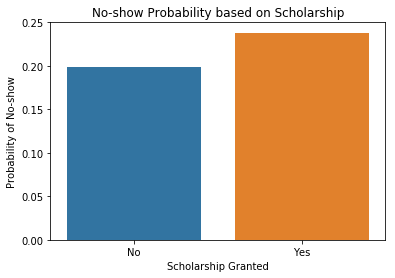

In [89]:
#Get the propability based on the scholarship
count_Scholarship = calculateProbability(data,['Scholarship'], True)
print("Probability Values are", count_Scholarship) #display vlaues
#Plot the graph
sns.barplot(x = ['No','Yes'] , y=np.array(list(count_Scholarship.values())))
plt.title('No-show Probability based on Scholarship');
plt.xlabel('Scholarship Granted')
plt.ylabel('Probability of No-show');

In [77]:
data.groupby(['Scholarship','No-show']).count()

PatientId  AppointmentID  Gender  ScheduledDay  \
Scholarship No-show                                                   
0           No           77065          77065   77065         77065   
            Yes          19106          19106   19106         19106   
1           No            8238           8238    8238          8238   
            Yes           2571           2571    2571          2571   

                     AppointmentDay    Age  Neighbourhood  Hipertension  \
Scholarship No-show                                                       
0           No                77065  77065          77065         77065   
            Yes               19106  19106          19106         19106   
1           No                 8238   8238           8238          8238   
            Yes                2571   2571           2571          2571   

                     Diabetes  Alcoholism  Handcap  SMS_received  
Scholarship No-show                                               
0           No          77065       77065    77065         77065  
            Yes         19106       19106    19106         19106  
1           No           8238        8238     8238          8238  
            Yes          2571        2571     2571          2571

### Inferences for Scholarship Analysis
People without scholarship are more likely to make it to the appointment

## SMS Analysis

Probability valuse are {0: 0.16726062213381954, 1: 0.27665972704140646}


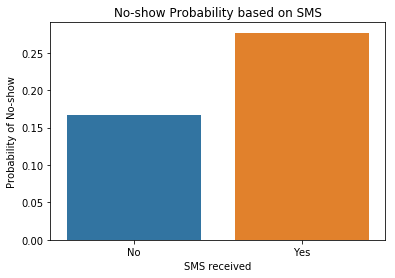

In [90]:
count_sms = calculateProbability(data,['SMS_received'],True)
print("Probability valuse are",count_sms) #display vlaues
#Plot the graph
sns.barplot(x = ['No', 'Yes'] , y=np.array(list(count_sms.values())))
plt.title('No-show Probability based on SMS');
plt.xlabel('SMS received')
plt.ylabel('Probability of No-show');

In [79]:
data.groupby('SMS_received').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
SMS_received,,,,,,,,,,,,,
0,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396,72396
1,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584,34584


### Inferences for SMS Analysis
People who have not recevied SMS tend to miss the appointment

# Step 4: Conclusions

Nearly 20% of the people do not show up irrespective of gender
Women tend to have less No-shows than men in the given data set
People without scholarship are more likely to make it to the appointment
People who have not recevied SMS tend to miss the appointment